# Taller 10 - Filtro Visual: Convoluciones Personalizadas

# Implementar librerias necesarias:

In [1]:
# Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Subir la imagen:

In [2]:
# Subir imagen desde tu computadora
uploaded = files.upload()  # Esto permitirá subir la imagen

# Cargar la imagen en escala de grises
image = cv2.imread(list(uploaded.keys())[0], cv2.IMREAD_GRAYSCALE)

Saving bcsOriginal.jpg to bcsOriginal.jpg


# Función para aplicar convolución manual con un kernel

In [3]:
def convolucion_manual(image, kernel):
    # Obtener las dimensiones de la imagen y el kernel
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    # Crear una nueva imagen para almacenar los resultados
    result = np.zeros_like(image)

    # Rellenar la imagen de salida con los resultados de la convolución
    for i in range(image_height):
        for j in range(image_width):
            # Definir la región de la imagen que se va a convolucionar
            region = image[i:i+kernel_height, j:j+kernel_width]

            # Verificar si la región se sale de los límites de la imagen
            if region.shape == kernel.shape:
                # Aplicar la convolución (producto punto entre la región y el kernel)
                result[i, j] = np.sum(region * kernel)

    return result

# Definir kernels personalizados

In [4]:
# 1. Filtro de enfoque (sharpening)
kernel_sharpening = np.array([[0, -0.5, 0],
                              [-0.5, 4,-0.5],
                              [0, -0.5, 0]])

# 2. Filtro de suavizado (blur)
kernel_blur = np.ones((5, 5), np.float32) / 25

# 3. Filtro de detección de bordes (Sobel)
kernel_sobel = np.array([[-1, -1, -1],
                         [ 0,  0,  0],
                         [ 1,  1,  1]])

# Aplicar filtros y mostrar resultados

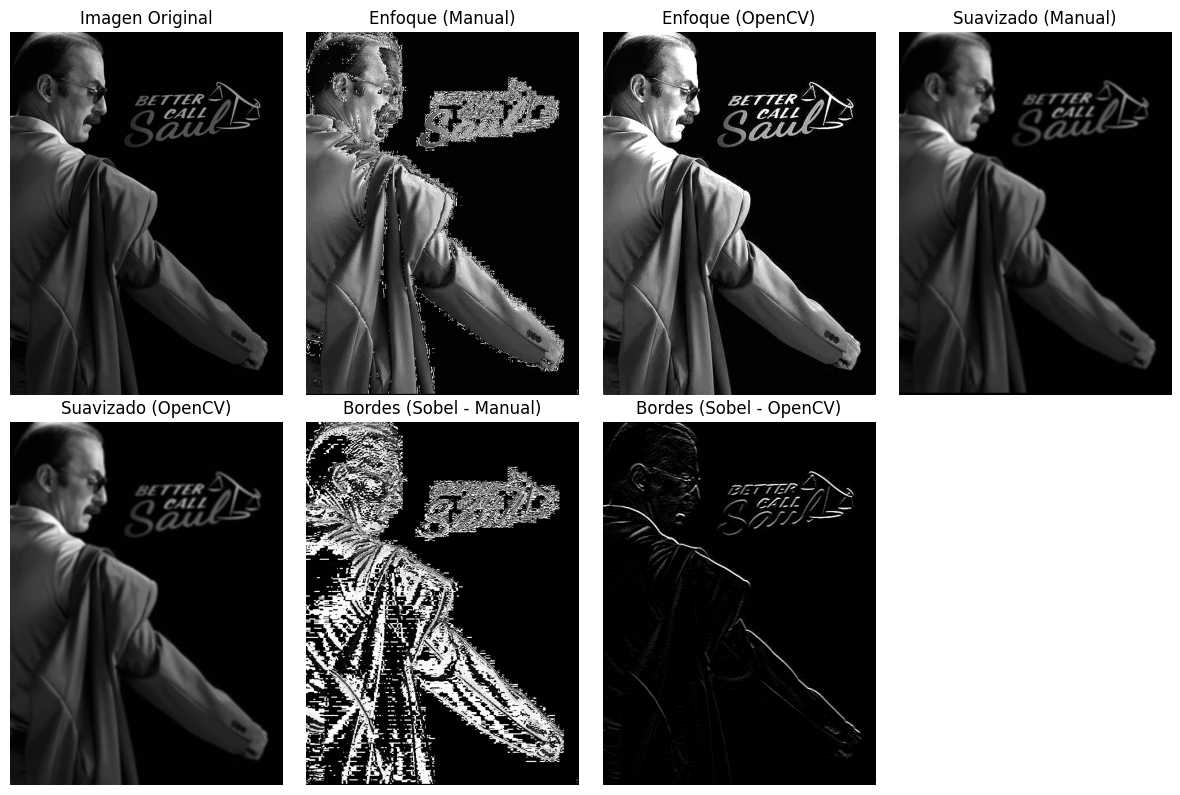

In [5]:
# Aplicar los filtros personalizados con la función de convolución manual
result_sharpening = convolucion_manual(image, kernel_sharpening)
result_blur = convolucion_manual(image, kernel_blur)
result_sobel = convolucion_manual(image, kernel_sobel)

# Comparar los resultados con los filtros predefinidos de OpenCV
result_sharpening_opencv = cv2.filter2D(image, -1, kernel_sharpening)
result_blur_opencv = cv2.filter2D(image, -1, kernel_blur)
result_sobel_opencv = cv2.filter2D(image, -1, kernel_sobel)

# Mostrar las imágenes originales y los resultados
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(2, 4, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Imagen con enfoque
plt.subplot(2, 4, 2)
plt.title("Enfoque (Manual)")
plt.imshow(result_sharpening, cmap='gray')
plt.axis('off')

# Imagen con enfoque usando OpenCV
plt.subplot(2, 4, 3)
plt.title("Enfoque (OpenCV)")
plt.imshow(result_sharpening_opencv, cmap='gray')
plt.axis('off')

# Imagen con suavizado
plt.subplot(2, 4, 4)
plt.title("Suavizado (Manual)")
plt.imshow(result_blur, cmap='gray')
plt.axis('off')

# Imagen con suavizado usando OpenCV
plt.subplot(2, 4, 5)
plt.title("Suavizado (OpenCV)")
plt.imshow(result_blur_opencv, cmap='gray')
plt.axis('off')

# Imagen con bordes (Sobel) manual
plt.subplot(2, 4, 6)
plt.title("Bordes (Sobel - Manual)")
plt.imshow(result_sobel, cmap='gray')
plt.axis('off')

# Imagen con bordes (Sobel) OpenCV
plt.subplot(2, 4, 7)
plt.title("Bordes (Sobel - OpenCV)")
plt.imshow(result_sobel_opencv, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# Bonus:

Crear una interfaz interactiva con sliders (cv2.createTrackbar) para probar diferentes valores del kernel.

Button(description='Aplicar filtro', style=ButtonStyle())

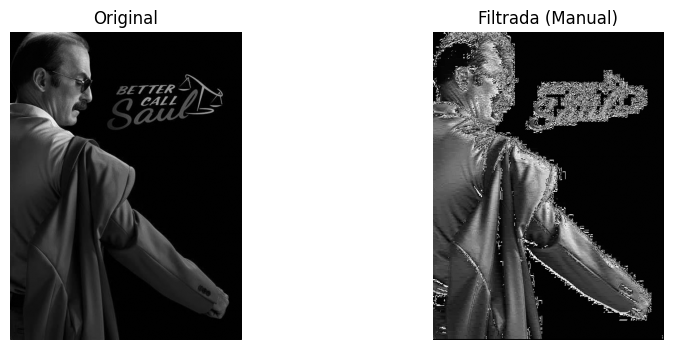

In [7]:
#intalar librerias para el bonus:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Crear sliders para cada valor del kernel 3x3
sliders = [[widgets.IntSlider(value=0, min=-5, max=5, step=1, description=f'K{i}{j}')

          for j in range(3)] for i in range(3)]


# Botón para aplicar el filtro
btn_aplicar = widgets.Button(description="Aplicar filtro")

# Función que extrae los valores del kernel y aplica la convolución
def aplicar_kernel(b):
    kernel = np.array([[sliders[i][j].value for j in range(3)] for i in range(3)], dtype=np.float32)
    resultado = convolucion_manual(image, kernel)


    # Mostrar la imagen original y el resultado
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Filtrada (Manual)")
    plt.imshow(resultado, cmap='gray')
    plt.axis('off')
    plt.show()


# Conectar botón
btn_aplicar.on_click(aplicar_kernel)

# Mostrar widgets
for fila in sliders:
    display(widgets.HBox(fila))
display(btn_aplicar)
